In [1]:
#import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy.stats as stats
from scipy.stats import chi2_contingency
import math

%matplotlib inline
from scipy.stats import norm
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_excel('SampleDonorData.xlsx')

# Exploratory Data Analysis

In [3]:
#Exploratory Data Analysis
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 19372 rows and 25 columns.


In [4]:
df.head(20)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,97,1,0,A3,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,78,1,0,A1,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,79,1,0,A2,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,42,1,0,A1,0.100,26.0,25,6,26,67
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,90,1,0,A4,0.500,16.0,9,13,16,53
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,40,1,0,A1,0.200,23.0,9,34,5,126
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,80,1,0,A3,0.333,16.0,10,31,8,125
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,44,0,0,A1,0.273,24.0,21,11,24,88
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,67,1,1,S2,0.182,17.0,27,13,17,124


In [5]:
#median home value in $100 and median household income in $100
MEDIAN_HOME_VALUE_IN_100 = df['MEDIAN_HOME_VALUE'] *100
#MEDIAN_HOME_VALUE_IN_100

MEDIAN_HOUSEHOLD_INCOME_IN_100 = df['MEDIAN_HOUSEHOLD_INCOME']*100
#MEDIAN_HOUSEHOLD_INCOME_IN_100

In [6]:
#Append the new variables into the dataset
df['MEDIAN_HOUSEHOLD_INCOME_IN_100'] = MEDIAN_HOUSEHOLD_INCOME_IN_100

In [7]:
df['MEDIAN_HOME_VALUE_IN_100'] = MEDIAN_HOME_VALUE_IN_100

In [8]:
#drop the original observations
df.drop(['MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME'], axis = 1, inplace = True)

In [9]:
#Getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_B                          19372 non-null int64
TARGET_D                          19372 non-null int64
CONTROL_NUMBER                    19372 non-null int64
MONTHS_SINCE_ORIGIN               19372 non-null int64
DONOR_AGE                         14577 non-null float64
IN_HOUSE                          19372 non-null int64
URBANICITY                        19372 non-null object
CLUSTER_CODE                      18918 non-null float64
HOME_OWNER                        19372 non-null object
DONOR_GENDER                      19372 non-null object
INCOME_GROUP                      14980 non-null float64
PUBLISHED_PHONE                   19372 non-null int64
WEALTH_RATING                     10562 non-null float64
PCT_OWNER_OCCUPIED                19372 non-null int64
PEP_STAR                          19372 non-null int64
RECENT_STAR_STATUS                19372 non-null int64


Text(0.5, 1.0, 'Distribution of Amount of Donation to the Organization')

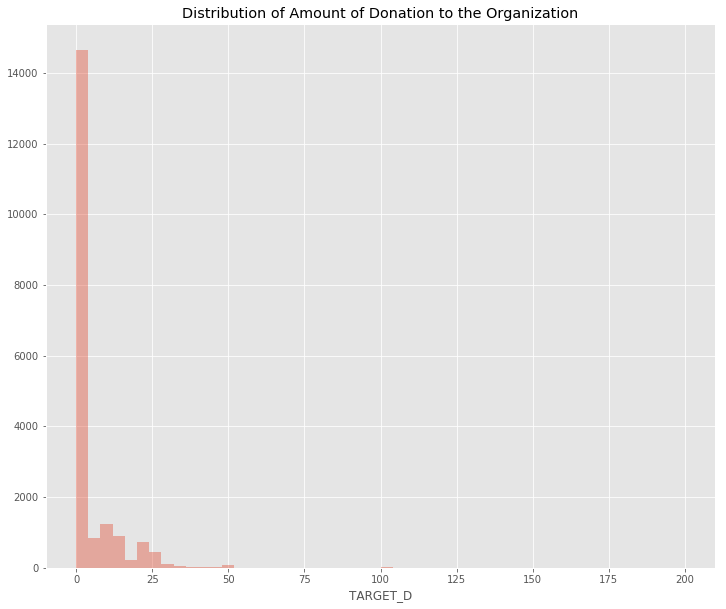

In [10]:
#visualizing the distribution of the target variables
plt.figure(figsize=(12,10))
sns.distplot(df['TARGET_D'],  kde=False)
plt.title('Distribution of Amount of Donation to the Organization')

0    75.0
1    25.0
Name: TARGET_B, dtype: float64


pandas.core.series.Series

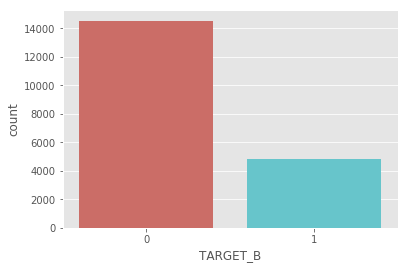

In [11]:
# Distribution of levels in the categorical variable
print(df['TARGET_B'].value_counts(normalize= True)*100)
sns.countplot(x='TARGET_B',data=df, palette='hls')
#plt.show()

# Changing the type of the variable
df['TARGET_B'] = df['TARGET_B'].astype('object')
type(df['TARGET_B'])

In [12]:
#Correlation matrix 
df.corr()

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
TARGET_D,1.000000,0.025529,0.003485,0.009811,0.044732,-0.038912,0.071163,-0.003304,0.065305,0.009178,0.006032,-0.015769,-0.003454,-0.005348,0.196432,0.054310,-0.033914,0.005893,0.069896,0.082961
CONTROL_NUMBER,0.025529,1.000000,-0.077874,-0.007441,-0.213938,-0.183491,0.062979,-0.110440,-0.019119,-0.099438,-0.067940,-0.039897,0.019523,-0.004883,0.000228,-0.316467,0.046103,-0.086687,0.104717,0.258975
MONTHS_SINCE_ORIGIN,0.003485,-0.077874,1.000000,0.236176,0.155967,0.071163,-0.082441,0.065620,-0.075190,0.036224,0.534299,0.351730,-0.197896,0.048813,-0.099205,0.149149,-0.027650,0.987825,-0.037086,-0.047490
DONOR_AGE,0.009811,-0.007441,0.236176,1.000000,0.117878,0.020086,-0.202690,0.074596,-0.077975,-0.017776,0.140209,0.102070,-0.024603,-0.025662,-0.050276,0.093864,-0.081111,0.235322,-0.061093,-0.001373
IN_HOUSE,0.044732,-0.213938,0.155967,0.117878,1.000000,-0.024557,-0.029429,0.009204,0.002980,-0.015530,0.105324,0.063512,-0.009930,0.009830,0.050223,0.575198,-0.321198,0.167424,0.016658,0.042499
CLUSTER_CODE,-0.038912,-0.183491,0.071163,0.020086,-0.024557,1.000000,-0.202592,0.016876,-0.378997,0.202207,0.070058,0.044793,0.018920,-0.006715,-0.061042,0.001794,0.002013,0.070497,-0.372409,-0.459601
INCOME_GROUP,0.071163,0.062979,-0.082441,-0.202690,-0.029429,-0.202592,1.000000,-0.027687,0.419194,0.181049,-0.088456,-0.087870,-0.030405,0.031975,0.096861,-0.020498,0.043553,-0.081415,0.428270,0.323530
PUBLISHED_PHONE,-0.003304,-0.110440,0.065620,0.074596,0.009204,0.016876,-0.027687,1.000000,0.057780,0.071095,0.032047,0.006525,-0.020203,0.001363,-0.027581,-0.000997,0.004298,0.065033,0.024361,-0.077932
WEALTH_RATING,0.065305,-0.019119,-0.075190,-0.077975,0.002980,-0.378997,0.419194,0.057780,1.000000,0.234229,-0.067966,-0.058719,-0.020025,0.021446,0.091769,0.002820,0.010353,-0.075484,0.603792,0.390796
PCT_OWNER_OCCUPIED,0.009178,-0.099438,0.036224,-0.017776,-0.015530,0.202207,0.181049,0.071095,0.234229,1.000000,0.029211,0.001976,-0.013065,0.001380,-0.002517,0.003003,0.011584,0.036404,0.443672,0.037510


Text(0.5, 1.0, 'Heatmap Correlation for Sample Donor Dataset')

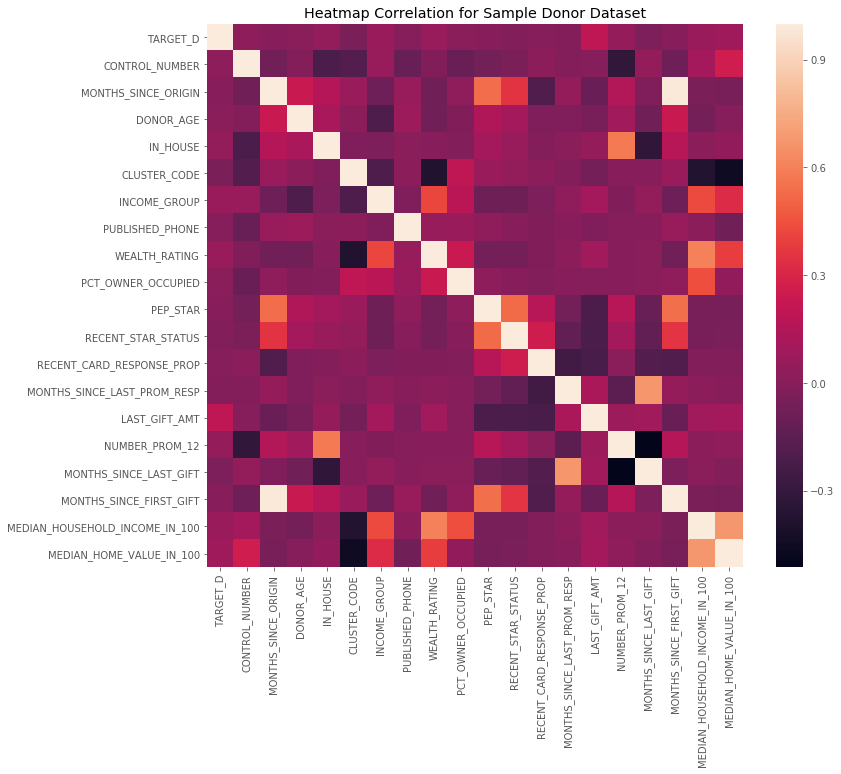

In [13]:
#heatmap correlation visualization
corr = df.corr()
plt.figure(figsize=(12,10))
heatviz = sns.heatmap(data = corr)
plt.title('Heatmap Correlation for Sample Donor Dataset')

# Data Preparation and Cleaning

In [14]:
df.head(15)


,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,0,A4,0.500,16.0,9,13,16,53,63100,232100
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,0,A1,0.200,23.0,9,34,5,126,20300,64100
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,0,A3,0.333,16.0,10,31,8,125,49400,117700
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,0,A1,0.273,24.0,21,11,24,88,30300,169600
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,1,S2,0.182,17.0,27,13,17,124,24300,66200


In [15]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                       454
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                      4392
PUBLISHED_PHONE                      0
WEALTH_RATING                     8810
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [16]:
#understanding zero observations in continuos variable
print((df[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'MEDIAN_HOME_VALUE_IN_100', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'PCT_OWNER_OCCUPIED', 'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP','LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT' ]] ==0).sum())

CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                            2
MEDIAN_HOME_VALUE_IN_100           218
MEDIAN_HOUSEHOLD_INCOME_IN_100     174
PCT_OWNER_OCCUPIED                 218
RECENT_CARD_RESPONSE_PROP         3936
MONTHS_SINCE_LAST_PROM_RESP          0
LAST_GIFT_AMT                       75
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
dtype: int64


In [17]:
#checking for character symbols in missing variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] =="?").sum())

IN_HOUSE                 0
URBANICITY             454
CLUSTER_CODE             0
HOME_OWNER               0
DONOR_GENDER             0
INCOME_GROUP             0
PUBLISHED_PHONE          0
WEALTH_RATING            0
PEP_STAR                 0
RECENT_STAR_STATUS       0
recency_freq_status      0
dtype: int64


In [18]:
#understanding zero observations in categorical variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] ==0).sum())

IN_HOUSE               17954
URBANICITY                 0
CLUSTER_CODE               0
HOME_OWNER                 0
DONOR_GENDER               0
INCOME_GROUP               0
PUBLISHED_PHONE         9730
WEALTH_RATING            669
PEP_STAR                9600
RECENT_STAR_STATUS     15083
recency_freq_status        0
dtype: int64


In [19]:
# Replacing '?' values in 'URBANICITY' ('?' is a missing value)
df['URBANICITY'] = df['URBANICITY'].replace('?', np.NaN)


In [20]:
#rechecking for character symbols in missing variables
print((df[['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']] =="?").sum())

IN_HOUSE               0
URBANICITY             0
CLUSTER_CODE           0
HOME_OWNER             0
DONOR_GENDER           0
INCOME_GROUP           0
PUBLISHED_PHONE        0
WEALTH_RATING          0
PEP_STAR               0
RECENT_STAR_STATUS     0
recency_freq_status    0
dtype: int64


In [21]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                         454
CLUSTER_CODE                       454
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                      4392
PUBLISHED_PHONE                      0
WEALTH_RATING                     8810
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [22]:
#taking care of categorical missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = '?', strategy = 'most_frequent')
imputer_NaN = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')


df['URBANICITY'] = imputer_NaN.fit_transform(df[['URBANICITY']])
df['CLUSTER_CODE'] = imputer_NaN.fit_transform(df[['CLUSTER_CODE']])
df['INCOME_GROUP'] = imputer_NaN.fit_transform(df[['INCOME_GROUP']])
df['WEALTH_RATING'] = imputer_NaN.fit_transform(df[['WEALTH_RATING']])

In [23]:
# rechecking for missing values
df.loc[:,['IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER','DONOR_GENDER','INCOME_GROUP', 'PUBLISHED_PHONE',
                  'WEALTH_RATING','PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status']].isnull().sum()

IN_HOUSE               0
URBANICITY             0
CLUSTER_CODE           0
HOME_OWNER             0
DONOR_GENDER           0
INCOME_GROUP           0
PUBLISHED_PHONE        0
WEALTH_RATING          0
PEP_STAR               0
RECENT_STAR_STATUS     0
recency_freq_status    0
dtype: int64

In [24]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                             0
TARGET_D                             0
CONTROL_NUMBER                       0
MONTHS_SINCE_ORIGIN                  0
DONOR_AGE                         4795
IN_HOUSE                             0
URBANICITY                           0
CLUSTER_CODE                         0
HOME_OWNER                           0
DONOR_GENDER                         0
INCOME_GROUP                         0
PUBLISHED_PHONE                      0
WEALTH_RATING                        0
PCT_OWNER_OCCUPIED                   0
PEP_STAR                             0
RECENT_STAR_STATUS                   0
recency_freq_status                  0
RECENT_CARD_RESPONSE_PROP            0
MONTHS_SINCE_LAST_PROM_RESP        246
LAST_GIFT_AMT                        0
NUMBER_PROM_12                       0
MONTHS_SINCE_LAST_GIFT               0
MONTHS_SINCE_FIRST_GIFT              0
MEDIAN_HOUSEHOLD_INCOME_IN_100       0
MEDIAN_HOME_VALUE_IN_100             0
dtype: int64


In [25]:
#taking care of continuos missing variables
imputer = SimpleImputer(strategy = 'mean')

In [26]:
#imputing on continuous variable
df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] =imputer.fit_transform(df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']])

In [27]:
#Total missing values for each feature
print(df.isnull().sum())

TARGET_B                          0
TARGET_D                          0
CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                         0
IN_HOUSE                          0
URBANICITY                        0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                      0
PUBLISHED_PHONE                   0
WEALTH_RATING                     0
PCT_OWNER_OCCUPIED                0
PEP_STAR                          0
RECENT_STAR_STATUS                0
recency_freq_status               0
RECENT_CARD_RESPONSE_PROP         0
MONTHS_SINCE_LAST_PROM_RESP       0
LAST_GIFT_AMT                     0
NUMBER_PROM_12                    0
MONTHS_SINCE_LAST_GIFT            0
MONTHS_SINCE_FIRST_GIFT           0
MEDIAN_HOUSEHOLD_INCOME_IN_100    0
MEDIAN_HOME_VALUE_IN_100          0
dtype: int64


In [28]:
print((df[['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP']] ==0).sum())

DONOR_AGE                      2
MONTHS_SINCE_LAST_PROM_RESP    0
dtype: int64


In [29]:
df.head(30)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,0,A4,0.500,16.0,9,13,16,53,63100,232100
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,0,A1,0.200,23.0,9,34,5,126,20300,64100
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,0,A3,0.333,16.0,10,31,8,125,49400,117700
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,0,A1,0.273,24.0,21,11,24,88,30300,169600
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,1,S2,0.182,17.0,27,13,17,124,24300,66200


In [30]:
#rearrange columns
DF = df[['TARGET_D', 'TARGET_B', 'DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP', 'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',  'PCT_OWNER_OCCUPIED',  'RECENT_CARD_RESPONSE_PROP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT','HOME_OWNER', 'DONOR_GENDER', 'URBANICITY', 'recency_freq_status', 'CLUSTER_CODE', 'INCOME_GROUP', 'WEALTH_RATING', 'IN_HOUSE','PUBLISHED_PHONE', 'PEP_STAR', 'RECENT_STAR_STATUS']]

In [31]:
df.head(30)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,MEDIAN_HOUSEHOLD_INCOME_IN_100,MEDIAN_HOME_VALUE_IN_100
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,0,A3,0.375,21.0,14,13,21,75,37400,108300
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,0,A3,0.222,18.0,37,14,18,127,26600,70500
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,0,A1,0.125,18.0,12,13,18,129,40700,80900
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,0,A2,0.125,17.0,10,7,15,130,25600,46400
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,0,A1,0.100,26.0,25,6,26,67,34200,162500
5,1,13,179339,53,4.0,0,T,35.0,H,M,...,0,A4,0.500,16.0,9,13,16,53,63100,232100
6,0,0,7799,137,6.0,1,U,9.0,U,F,...,0,A1,0.200,23.0,9,34,5,126,20300,64100
7,0,0,12542,137,6.0,1,S,13.0,U,M,...,0,A3,0.333,16.0,10,31,8,125,49400,117700
8,0,0,36636,89,6.0,0,C,23.0,H,F,...,0,A1,0.273,24.0,21,11,24,88,30300,169600
9,0,0,37268,125,6.0,0,U,8.0,U,F,...,1,S2,0.182,17.0,27,13,17,124,24300,66200


In [32]:
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'PCT_OWNER_OCCUPIED', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'recency_freq_status', 'RECENT_CARD_RESPONSE_PROP',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LAST_GIFT_AMT', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT',
       'MEDIAN_HOUSEHOLD_INCOME_IN_100', 'MEDIAN_HOME_VALUE_IN_100'],
      dtype='object')

In [33]:
#Get dummy variables
df = pd.get_dummies(df, prefix_sep='_', drop_first = True)

In [34]:
df

,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,PCT_OWNER_OCCUPIED,...,recency_freq_status_L2,recency_freq_status_L4,recency_freq_status_N1,recency_freq_status_N2,recency_freq_status_N3,recency_freq_status_N4,recency_freq_status_S1,recency_freq_status_S2,recency_freq_status_S3,recency_freq_status_S4
0,0,89765,77,0.000000,0,20.0,2.0,1,3.0,72,...,0,0,0,0,0,0,0,0,0,0
1,0,137263,137,0.000000,0,23.0,2.0,1,5.0,97,...,0,0,0,0,0,0,0,0,0,0
2,0,89966,137,2.000000,0,23.0,5.0,0,6.0,78,...,0,0,0,0,0,0,0,0,0,0
3,0,100147,137,2.000000,0,21.0,1.0,0,4.0,79,...,0,0,0,0,0,0,0,0,0,0
4,0,148098,77,2.000000,0,20.0,5.0,1,5.0,42,...,0,0,0,0,0,0,0,0,0,0
5,13,179339,53,4.000000,0,35.0,7.0,1,8.0,90,...,0,0,0,0,0,0,0,0,0,0
6,0,7799,137,6.000000,1,9.0,1.0,0,8.0,40,...,0,0,0,0,0,0,0,0,0,0
7,0,12542,137,6.000000,1,13.0,5.0,0,9.0,80,...,0,0,0,0,0,0,0,0,0,0
8,0,36636,89,6.000000,0,23.0,1.0,0,8.0,44,...,0,0,0,0,0,0,0,0,0,0
9,0,37268,125,6.000000,0,8.0,1.0,1,2.0,67,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df.columns

Index(['TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE',
       'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'WEALTH_RATING', 'PCT_OWNER_OCCUPIED', 'PEP_STAR', 'RECENT_STAR_STATUS',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'MEDIAN_HOUSEHOLD_INCOME_IN_100',
       'MEDIAN_HOME_VALUE_IN_100', 'TARGET_B_1', 'URBANICITY_R',
       'URBANICITY_S', 'URBANICITY_T', 'URBANICITY_U', 'HOME_OWNER_U',
       'DONOR_GENDER_F', 'DONOR_GENDER_M', 'DONOR_GENDER_U',
       'recency_freq_status_A2', 'recency_freq_status_A3',
       'recency_freq_status_A4', 'recency_freq_status_E1',
       'recency_freq_status_E2', 'recency_freq_status_E3',
       'recency_freq_status_E4', 'recency_freq_status_F1',
       'recency_freq_status_F2', 'recency_freq_status_F3',
       'recency_freq_status_F4', 'recency_freq_status_L1',
       'recency_freq_st

In [36]:
TARGET_B_1= df['TARGET_B_1']
df.drop(labels=['TARGET_B_1'], axis=1,inplace = True)
df.insert(0, 'TARGET_B_1', TARGET_B_1)

In [37]:
df.head(20)

,TARGET_B_1,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,...,recency_freq_status_L2,recency_freq_status_L4,recency_freq_status_N1,recency_freq_status_N2,recency_freq_status_N3,recency_freq_status_N4,recency_freq_status_S1,recency_freq_status_S2,recency_freq_status_S3,recency_freq_status_S4
0,0,0,89765,77,0.0,0,20.0,2.0,1,3.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,137263,137,0.0,0,23.0,2.0,1,5.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,89966,137,2.0,0,23.0,5.0,0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,100147,137,2.0,0,21.0,1.0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,148098,77,2.0,0,20.0,5.0,1,5.0,...,0,0,0,0,0,0,0,0,0,0
5,1,13,179339,53,4.0,0,35.0,7.0,1,8.0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,7799,137,6.0,1,9.0,1.0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,12542,137,6.0,1,13.0,5.0,0,9.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,36636,89,6.0,0,23.0,1.0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,37268,125,6.0,0,8.0,1.0,1,2.0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#Train, Test features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [39]:
X

array([[0.00000e+00, 8.97650e+04, 7.70000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.37263e+05, 1.37000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 8.99660e+04, 1.37000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 1.91355e+05, 7.70000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.91604e+05, 1.13000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.91746e+05, 2.90000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [40]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [41]:
# train test split for classification model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
# importing the models to be considered.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [44]:
#Comparing Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.999809 (0.000550)
KNN: 0.834231 (0.013270)
SVM: 0.999576 (0.000685)
Naive_Bayes: 0.994848 (0.002363)
RF: 0.999999 (0.000003)


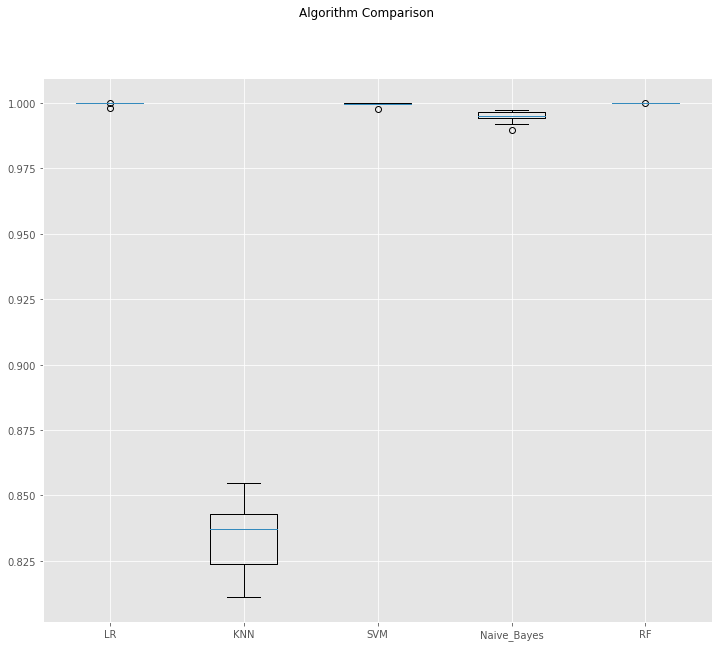

In [45]:
#boxplot algorithm comparison
fig = plt.figure(figsize=(12,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
#Model Evaluations
randomf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
randomf_model.fit(X_train, y_train)
y_ran_pred = randomf_model.predict(X_test)

In [47]:
y_ran_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [48]:
#Confusion matrix for Random Forest Classifier
cm_randf = confusion_matrix(y_test, y_ran_pred)

In [49]:
cm_randf

array([[2880,    0],
       [   0,  995]], dtype=int64)

In [50]:
#Knn Evaluation
K_NN_Model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
K_NN_Model.fit(X_train, y_train)

y_neighb_pred = K_NN_Model.predict(X_test)

In [51]:
y_neighb_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [52]:
#Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_neighb_pred)

In [53]:
cm_knn

array([[2759,  121],
       [ 571,  424]], dtype=int64)

In [55]:
SVC_model = SVC(kernel = 'linear', random_state =0)
SVC_model.fit(X_train, y_train)

y_SVC_pred = SVC_model.predict(X_test)

In [56]:
y_SVC_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [57]:
#Confusion matrix for SVC
cm_SVC = confusion_matrix(y_test, y_SVC_pred)

In [58]:
cm_SVC

array([[2880,    0],
       [   1,  994]], dtype=int64)

In [61]:
Naive_model = GaussianNB()
Naive_model.fit(X_train, y_train)

y_naive_pred = Naive_model.predict(X_test)

In [65]:
#Confusion matrix for Naive Bayes
cm_Naive = confusion_matrix(y_test, y_naive_pred)

In [66]:
cm_Naive

array([[ 130, 2750],
       [   0,  995]], dtype=int64)

In [67]:
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

y_LR = LR_model.predict(X_test)

In [68]:
#Confusion matrix for Naive Bayes
cm_LR = confusion_matrix(y_test, y_LR)

In [69]:
cm_LR

array([[2880,    0],
       [   9,  986]], dtype=int64)

#Confusion matric evaluation result:
<br>
Random Forest Model Predicted 100 percent correct
<br>
Logistic Regression made predicted 9 inaccurately
<br>
Naive Bayes predicted 2,750 inaccurately
<br>
KNN predicted 1, 263 inaccurately
<br>
SVC predicted 1 inaccurately